# SONAR Rock vs Mine Prediction Project

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

***Data Collection & Data Processing***

In [4]:
#Loading the dataset to a Pandas Dataframe
sonar_data=pd.read_csv('Downloads/sonar data.csv',header=None)

In [5]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
#Number of rows and columns
print("Shape of Sonar Data:",sonar_data.shape)

Shape of Sonar Data: (208, 61)


In [7]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [8]:
sonar_data[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

**M-->Mine**

**R-->Rock**

In [10]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


***PIE CHART For Class Distribution***

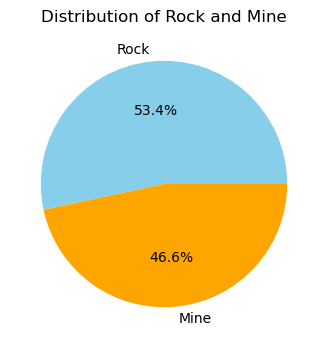

In [12]:
plt.figure(figsize=(4, 4))
sonar_data[60].value_counts().plot.pie(autopct='%1.1f%%', labels=['Rock', 'Mine'], colors=['skyblue', 'orange'])
plt.title("Distribution of Rock and Mine")
plt.ylabel("")
plt.show()

***BAR PLOT Of Class Distribution***

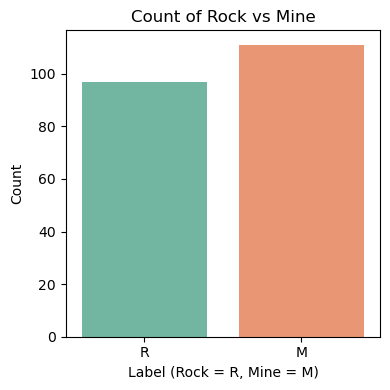

In [14]:
plt.figure(figsize=(4, 4))
sns.countplot(x=sonar_data.iloc[:, 60], hue=sonar_data.iloc[:, 60], palette='Set2', legend=False)
plt.title("Count of Rock vs Mine")
plt.xlabel("Label (Rock = R, Mine = M)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

***HEATMAP Of Feature Correlation***

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')


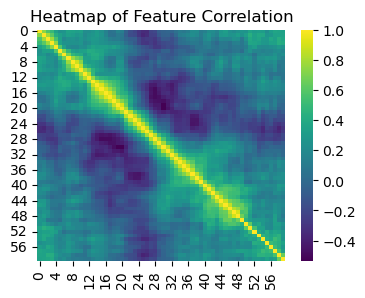

In [16]:
print(sonar_data.columns)
plt.figure(figsize=(4, 3))
sns.heatmap(sonar_data.iloc[:, :-1].corr(), cmap='viridis', annot=False)  # Excluding the last column
plt.title("Heatmap of Feature Correlation")
plt.show()

In [17]:
#Separating Data & Labels
X=sonar_data.drop(columns=60,axis=1)
Y=sonar_data[60]

In [18]:
print(X.head())
print(Y.head())

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      50      51      52      53      54      55      56  \
0  0.2111  ...  0.0232  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180   
1  0.2872  ...  0.0125  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140   
2  0.6194  ...  0.0033  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316   
3  0.1264  ...  0.0241  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050   
4  0.4459  ...  0.0156  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072   

       57      58      59  
0  0.0084  0.0090  0.0032  
1  0.0049  0.0052  0.0044  
2  0.016

***Training & Test Data***

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=1)

In [21]:
print(X.shape,X_train.shape,X_test.shape)

(208, 60) (187, 60) (21, 60)


In [22]:
print(X_train.head())
print(Y_train.head())

         0       1       2       3       4       5       6       7       8   \
115  0.0414  0.0436  0.0447  0.0844  0.0419  0.1215  0.2002  0.1516  0.0818   
38   0.0123  0.0022  0.0196  0.0206  0.0180  0.0492  0.0033  0.0398  0.0791   
56   0.0152  0.0102  0.0113  0.0263  0.0097  0.0391  0.0857  0.0915  0.0949   
123  0.0270  0.0163  0.0341  0.0247  0.0822  0.1256  0.1323  0.1584  0.2017   
18   0.0270  0.0092  0.0145  0.0278  0.0412  0.0757  0.1026  0.1138  0.0794   

         9   ...      50      51      52      53      54      55      56  \
115  0.1975  ...  0.0222  0.0045  0.0136  0.0113  0.0053  0.0165  0.0141   
38   0.0475  ...  0.0149  0.0125  0.0134  0.0026  0.0038  0.0018  0.0113   
56   0.1504  ...  0.0048  0.0049  0.0041  0.0036  0.0013  0.0046  0.0037   
123  0.2122  ...  0.0197  0.0189  0.0204  0.0085  0.0043  0.0092  0.0138   
18   0.1520  ...  0.0045  0.0084  0.0010  0.0018  0.0068  0.0039  0.0120   

         57      58      59  
115  0.0077  0.0246  0.0198  
38   0.0

***Model Training --> Logistic Regression***

In [24]:
model=LogisticRegression()

In [25]:
#Training The Logistic Regression Model With Training Data 
model.fit(X_train,Y_train);
print("Logistic Regression model has been trained.")

Logistic Regression model has been trained.


***Model Evaluation***

In [27]:
#Accuracy Of Training Data
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print("Accuracy on Training Data: ",training_data_accuracy)

Accuracy on Training Data:  0.8342245989304813


In [28]:
#Accuracy Of Test Data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print("Accuracy on Test Data: ",test_data_accuracy)

Accuracy on Test Data:  0.7619047619047619


***Predictive System***

In [30]:
input_data1=(0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,0.0801,0.1056,0.1266,0.0890,0.0198,0.1133,0.2826,0.3234,0.3238,0.4333,0.6068,0.7652,0.9203,0.9719,0.9207,0.7545,0.8289,0.8907,0.7309,0.6896,0.5829,0.4935,0.3101,0.0306,0.0244,0.1108,0.1594,0.1371,0.0696,0.0452,0.0620,0.1421,0.1597,0.1384,0.0372,0.0688,0.0867,0.0513,0.0092,0.0198,0.0118,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040)
#Changing into Numpy Array
input_data1_as_nupy=np.asarray(input_data1)
#Reshape the Numpy Array
input_data1_reshaped=input_data1_as_nupy.reshape(1,-1) #It means here is 1 instance
prediction=model.predict(input_data1_reshaped)
print(prediction)

['R']


In [31]:
input_data2=(0.0261,0.0266,0.0223,0.0749,0.1364,0.1513,0.1316,0.1654,0.1864,0.2013,0.2890,0.3650,0.3510,0.3495,0.4325,0.5398,0.6237,0.6876,0.7329,0.8107,0.8396,0.8632,0.8747,0.9607,0.9716,0.9121,0.8576,0.8798,0.7720,0.5711,0.4264,0.2860,0.3114,0.2066,0.1165,0.0185,0.1302,0.2480,0.1637,0.1103,0.2144,0.2033,0.1887,0.1370,0.1376,0.0307,0.0373,0.0606,0.0399,0.0169,0.0135,0.0222,0.0175,0.0127,0.0022,0.0124,0.0054,0.0021,0.0028,0.0023)
#Changing into Numpy Array
input_data2_as_nupy=np.asarray(input_data2)
#Reshape the Numpy Array
input_data2_reshaped=input_data2_as_nupy.reshape(1,-1) #It means here is 1 instance
prediction=model.predict(input_data2_reshaped)
print(prediction)

['M']


In [32]:
if (prediction[0]=='R'):
    print("The Object Is A Rock")
else:
        print("The Object Is A Mine")

The Object Is A Mine
